# ANN and CNN on Mnist Dataset  

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
#loading mnist dataset
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#1st data
#X_train[0]

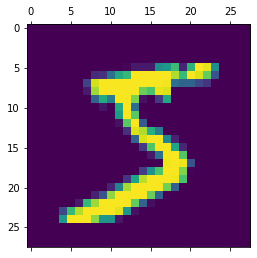

In [7]:
#ploting the 1st data
plt.matshow(X_train[0])

In [8]:
#shape is of 28*28 pixels
X_train[0].shape

(28, 28)

# ANN 
### Artificial Neural Network

In [9]:
#normalization
x_train_1,x_test_1=X_train/255.0,X_test/255.0

In [10]:
#x_train_1[0]

In [11]:
#flattening the 28*28 to 1D array of 784
X_train_flattern=x_train_1.reshape(len(x_train_1),28*28)
X_test_flattern=x_test_1.reshape(len(x_test_1),28*28)

In [12]:
X_train_flattern.shape

(60000, 784)

In [81]:
model=keras.Sequential()
#784->128
model.add(keras.layers.Dense(128,input_shape=(784,),activation='sigmoid'))
#128->32
model.add(keras.layers.Dense(32,activation='relu'))
#32->10....10 because 0 to 9
model.add(keras.layers.Dense(10,activation='softmax'))

In [82]:
#compiling
#optimizer adam
#loss calculation
#to see the accuracy we use metrics
#loss must be minimal and accuracy must the maximal
#crossentropy loss is for binary classification problem
#sparse_categorical_crossentropy is for multiclass classification problem
#adam is the best optimizer....other optimizer example Gradient Descent
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(X_train_flattern,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3814 - accuracy: 0.8954
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1762 - accuracy: 0.9473
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0935 - accuracy: 0.9712
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9778
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9853
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9883
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [87]:
model.summary()
#input*node+bias
#784*128+128
#128*32+32

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [88]:
#evaluating accuracy and loss over training set
model.evaluate(X_train_flattern,y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - accuracy: 0.9988


[0.0038802975323051214, 0.9988333582878113]

In [89]:
#evaluating accuracy and loss over testing set
model.evaluate(X_test_flattern,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1042 - accuracy: 0.9763


[0.10419494658708572, 0.9763000011444092]

In [90]:
#model prediction
ann_model=model.predict(X_test_flattern)

313/313 [==============================] - 1s 2ms/step


In [91]:
ann_model

array([[3.01845008e-16, 5.29522932e-13, 6.23388632e-11, ...,
        1.00000000e+00, 6.13565849e-15, 4.00461539e-11],
       [1.76481295e-11, 3.58774130e-08, 1.00000000e+00, ...,
        1.38764167e-16, 2.46606291e-10, 1.86215954e-18],
       [4.01302933e-13, 9.99988437e-01, 1.86394027e-06, ...,
        4.22117353e-07, 9.12093128e-06, 8.91335703e-12],
       ...,
       [1.53542329e-15, 3.60637728e-14, 2.48192533e-15, ...,
        2.46361931e-09, 6.16901197e-10, 1.41419662e-07],
       [1.02574914e-18, 7.84140412e-14, 1.64163388e-13, ...,
        1.37818123e-18, 2.39567925e-07, 3.55052753e-17],
       [6.73952560e-11, 1.32388805e-11, 3.17154769e-09, ...,
        4.92337106e-16, 2.76231760e-10, 2.97608864e-16]], dtype=float32)

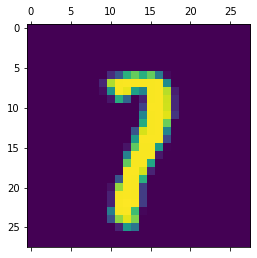

In [92]:
#original data
plt.matshow(X_test[111])

In [93]:
#to check the prediction
np.argmax(ann_model[111])

7

## Testing over self created data

In [94]:
#!pip install opencv-python

In [95]:
#load the image
r_image=cv2.imread(r'E:\8.png',cv2.IMREAD_GRAYSCALE)

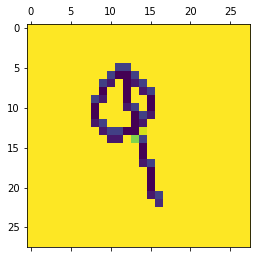

In [96]:
#original image
plt.matshow(r_image)

In [97]:
r_image.shape

(28, 28)

In [98]:
#to convert 255 to 0
k=cv2.bitwise_not(r_image)

In [99]:
#normalization
k=k/255.0

In [100]:
#flatten to shape 1,784
r_image_flatten=k.reshape(1,28*28)

In [101]:
r_image_flatten.shape

(1, 784)

In [102]:
#prediction
ann_predict=model.predict(r_image_flatten)

1/1 [==============================] - 0s 25ms/step


In [103]:
#to check the prediction
np.argmax(ann_predict[0])

9

### ANN model is successful in predicting over the test data set and self created data(s)
#### Accuracy 97.63% 

#####  1st layer is of 784 to 128 nodes and activation function sigmoid
#####  2nd layer is of 128 to 32 nodes and activation function relu
#####  Output layer is of 32 to 10 nodes and activation function softmax

# CNN 
### Convolutional Neural Network

In [104]:
#same dataset

In [105]:
X_train.shape

(60000, 28, 28)

In [110]:
from tensorflow.keras import layers, models

In [106]:
#normalization
x_train,x_test=X_train/255.0,X_test/255.0

In [107]:
#flatten to 28 28 1
x_train_f,x_test_f=np.expand_dims(x_train,axis=-1),np.expand_dims(x_test,axis=-1)

In [108]:
x_train_f.shape

(60000, 28, 28, 1)

In [111]:
#input shape
inputs=layers.Input(shape=(28,28,1))

### Conv2D->MaxPolling2D
### Conv2D->MaxPolling2D
### Flatten
### Sigmoid
### Softmax

In [238]:
#Conv2D = 2D Convolution Layer
#here it take 3,3 matrix ususally 
#[[1,1,1],
# [1,-1,1],
# [1,1,1]]     it is basically a loop detection..... in the resultant matrix if it results 1, the desired object is found
#ReLU is applied to convert '-'ve values to 0
c=(layers.Conv2D(32,(3,3),padding='valid',activation='relu'))(inputs)
##MaxPooling2D is a technique to reduce computational complexity
#2,2 filter is used  for getting the max
#2,2 stride is used  for shifting the fliter
m=(layers.MaxPooling2D((2,2),(2,2)))(c)
#padding valid means to without adding additional rows and columns in the output feature map
#size of the output feature map is less than the size of the input data
#reduces the parameters in the model and impoves the computational efficiency
c1=(layers.Conv2D(16,(3,3),padding='valid',activation='relu'))(m)
m1=(layers.MaxPooling2D((2,2),(2,2)))(c1)
#flatten is important because Conv2D works on 2D matrix... needed to be converted into 1D array
f=layers.Flatten()(m1)
#another layer of sigmoid is used
d=layers.Dense(16,activation='sigmoid')(f)
#softmax activation is used in output layer
out=layers.Dense(10,activation='softmax')(d)

##### Basic knowledge about cnn

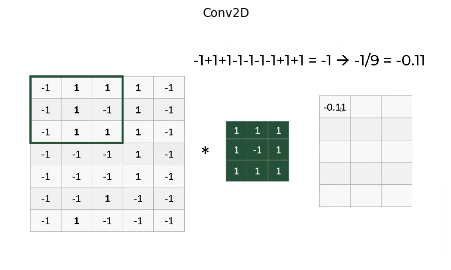

In [239]:
cn1=cv2.imread(r'E:\CNN\cnn1.jpg')
plt.matshow(cn1)
plt.axis('off')
plt.title('Conv2D')
plt.show()

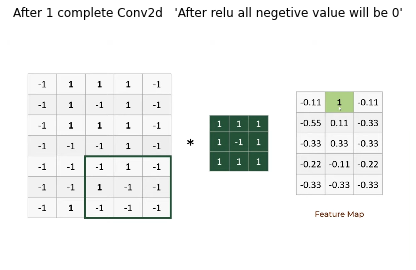

In [240]:
cn2=cv2.imread(r'E:\CNN\cnn2.jpg')
plt.matshow(cn2)
plt.axis('off')
plt.title('After 1 complete Conv2d   \'After relu all negetive value will be 0\'')
plt.show()

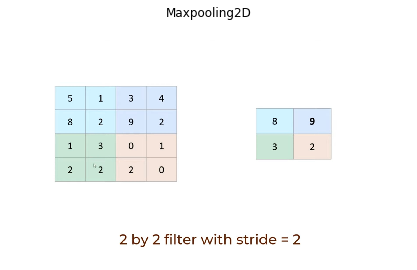

In [241]:
cn3=cv2.imread(r'E:\CNN\cnn3.jpg')
plt.matshow(cn3)
plt.axis('off')
plt.title('Maxpooling2D')
plt.show()

In [242]:
#model making
model1=models.Model(inputs,out)

In [243]:
#compliling
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [244]:
#training
model1.fit(x_train_f,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4954 - accuracy: 0.9026
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1287 - accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0799 - accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0471 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0387 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0333 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0290 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0254 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 20s 11m

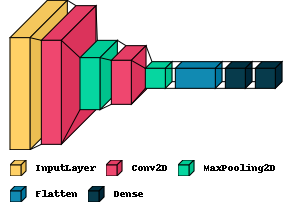

In [245]:
#Visualization of cnn layers
import visualkeras
visualkeras.layered_view(model1, legend=True)

In [246]:
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0   

In [247]:
#Evaluating over training dataset
model1.evaluate(x_train_f,y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - accuracy: 0.9946


[0.019534993916749954, 0.9945833086967468]

In [248]:
#Evaluating over testing set
model1.evaluate(x_test_f,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0388 - accuracy: 0.9870


[0.03880678117275238, 0.9869999885559082]

In [249]:
#prediction on testing set
cnn_model=model1.predict(x_test_f)

313/313 [==============================] - 1s 4ms/step


In [250]:
#predicted value by cnn
np.argmax(cnn_model[111])

7

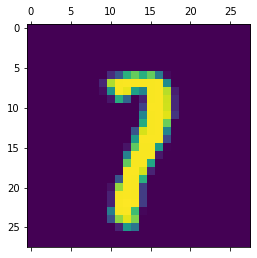

In [251]:
#original value
plt.matshow(X_test[111])

## Testing over self created data

In [252]:
#image loading
r_image=cv2.imread(r'E:\8.png',cv2.IMREAD_GRAYSCALE)

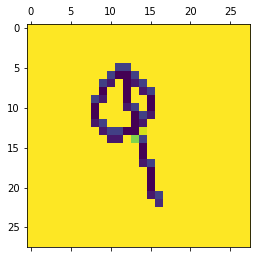

In [253]:
#original image
plt.matshow(r_image)

In [254]:
#converting 255 to 0
im=cv2.bitwise_not(r_image)

In [255]:
#normalization
im=k/255.

In [256]:
im.shape

(28, 28)

In [257]:
#flatten image to 28,28,1
im_f=np.expand_dims(im,axis=-1)

In [258]:
im_f.shape

(28, 28, 1)

In [259]:
#to reshape into 1 data to 1 row
im_f=im_f.reshape(1,28,28,1)

In [260]:
#predicting over self created data
cnn_predict=model1.predict(im_f)

1/1 [==============================] - 0s 23ms/step


In [261]:
#predicting result
np.argmax(cnn_predict[0])

9

## CNN model is successful in predicting over the test data set and self created data(s)
#### Accuracy 98.69% 